In [1]:
import tensorflow as tf
from model import GAN
import numpy as np

In [2]:
# load the train set of the MNIST dataset
(X_train, _), _ = tf.keras.datasets.mnist.load_data()

# normalize pixel values
X_train = X_train.astype(np.float32) / 127.5 - 1

# reshape the data to 4D tensor
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)


BATCH_SIZE = 64

dataset = tf.data.Dataset.from_tensor_slices(X_train)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True).prefetch(1)

11490434/11490434 [==============================] - 2s 0us/step


## Dense GAN

In [22]:
# Create a GAN model
gan_dense = GAN(latent_dim=32)

gan_dense.build(output_shape=(28, 28, 1), neurons=[64, 128])
gan_dense.compile(loss="binary_crossentropy", optimizer="adam")
# expanded summary
gan_dense.summary(expand_nested=True)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32)]              0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 784)               101136    
                                                                 
 activation_2 (Activation)   (None, 784)               0 

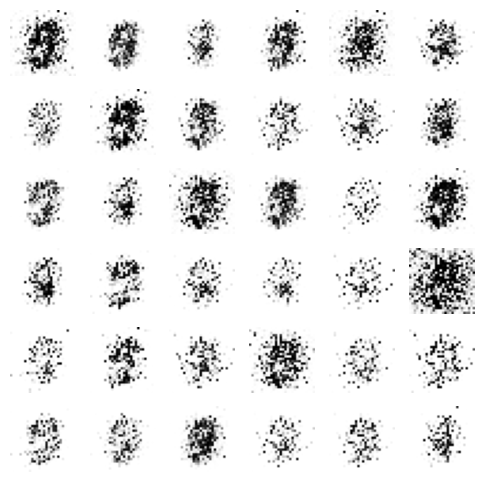

Epoch 10/10: 100%|██████████| 937/937 [00:32<00:00, 28.78it/s]


In [23]:
gan_dense.fit(dataset, epochs=10, show_image=True, show_interval=100, n_cols=6)

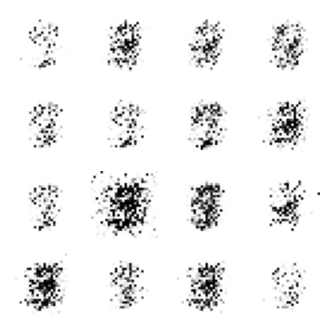

In [34]:
noise = tf.random.normal(shape=(16, 32))
img = gan_dense.generate(noise)
gan_dense.show_images(img, n_cols=4)

In [35]:
gan_dense.discriminate(img)

<tf.Tensor: shape=(16, 1), dtype=float32, numpy=
array([[0.05791391],
       [0.2709005 ],
       [0.0046424 ],
       [0.02117545],
       [0.14262034],
       [0.03565604],
       [0.34217325],
       [0.04096929],
       [0.18465596],
       [0.7631242 ],
       [0.06221832],
       [0.0559148 ],
       [0.43818414],
       [0.8645314 ],
       [0.3018251 ],
       [0.09836528]], dtype=float32)>

## DCGAN

In [ ]:
# Create a GAN model
gan_conv = GAN(latent_dim=32)

gan_conv.build(filters=[128, 64, 32], output_shape=(28,28,1))
gan_conv.compile(loss="binary_crossentropy", optimizer="adam")
# expanded summary
gan_conv.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 32)]              0         
                                                                 
 reshape (Reshape)           (None, 1, 1, 32)          0         
                                                                 
 conv_block_0_conv (Conv2DTr  (None, 4, 4, 128)        65536     
 anspose)                                                        
                                                                 
 conv_block_0_batchnorm (Bat  (None, 4, 4, 128)        512       
 chNormalization)                                                
                                                                 
 conv_block_0_activation (Ac  (None, 4, 4, 128)        0         
 tivation)                                                       
                                                         

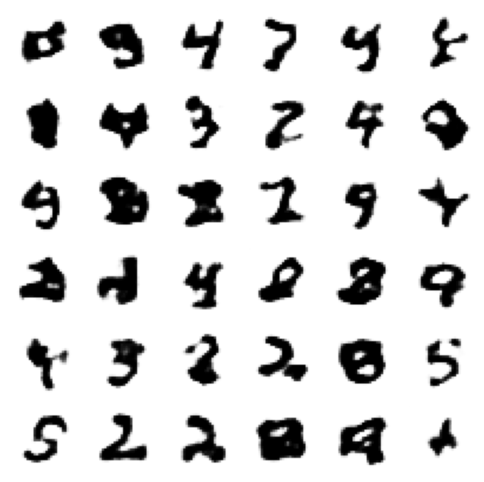

Epoch 10/10: 100%|██████████| 937/937 [00:45<00:00, 20.50it/s]


In [ ]:
gan_conv.fit(dataset, epochs=10, show_image=True, show_interval=100, n_cols=6)

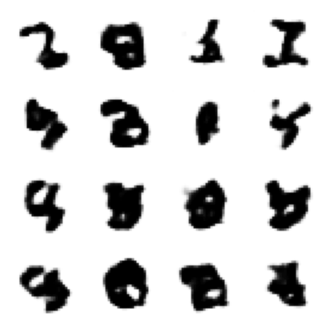

In [ ]:
noise = tf.random.normal(shape=(16, 32))
img = gan_conv.generate(noise)
gan_conv.show_images(img, n_cols=4)

In [ ]:
gan_conv.discriminate(img)

<tf.Tensor: shape=(16, 1), dtype=float32, numpy=
array([[0.9945839 ],
       [0.66546243],
       [0.99993825],
       [0.9145136 ],
       [0.9509988 ],
       [0.5683985 ],
       [0.99777716],
       [0.99277484],
       [0.9808358 ],
       [0.6825356 ],
       [0.12951972],
       [0.15516558],
       [0.9684687 ],
       [0.26244855],
       [0.43465456],
       [0.96322113]], dtype=float32)>

- here we can see that convolutional GAN performes better than dense GAN.